In [51]:
import graphlab as gl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import random

##Loading in the data

In [131]:
data_set = 'rebel10'
df_data = pd.read_csv(data_set+'.csv')
sf_data = gl.SFrame(df_data)
sf_data

Climb,User,rating
105989461,107860315,5
105857287,107860315,4
105983489,107860315,5
105762201,107860315,4
105753838,107860315,4
105753754,107860315,4
105753760,107860315,4
105753391,107860315,4
105753397,107860315,5
105753394,107860315,3


##Regularization value: Making a first run.

In [132]:
n=2
regularization_vals = np.logspace(-1,-5,5)
print regularization_vals
mse_scores = []
for i in range(n):
    (train_set, test_set) = sf_data.random_split(0.8)
    models = [gl.factorization_recommender.create(train_set, 'User', 'Climb', 'rating',
                                                  max_iterations=500000, num_factors=5,
                                                  regularization=r,
                                                  verbose=False)
              for r in regularization_vals]
    mse_scores += [gl.evaluation.rmse(test_set['rating'], mod.predict(test_set))
                  for mod in models]


[ERROR] Toolkit error: Cancelled by user.


[  1.00000000e-01   1.00000000e-02   1.00000000e-03   1.00000000e-04
   1.00000000e-05]
PROGRESS: Recsys training: model = factorization_recommender


ToolkitError: Cancelled by user.

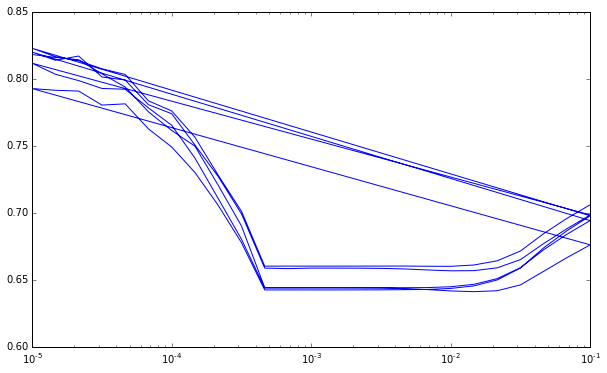

In [28]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.semilogx(list(regularization_vals)*n,mse_scores)

##Latent Feature Selection

In [133]:
n=1
num_factors = range(5)
mse_scores = []
for i in range(n):
    (train_set, test_set) = sf_data.random_split(0.8)
    models = [gl.factorization_recommender.create(train_set, 'User', 'Climb', 'rating',
                                                  max_iterations=5000, 
                                                  num_factors=num,
                                                  regularization=1e-3,
                                                  verbose=True)
              for num in num_factors]
    mse_scores += [gl.evaluation.rmse(test_set['rating'], mod.predict(test_set))
                  for mod in models]

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 7707 observations with 259 users and 299 items.
PROGRESS:     Data prepared in: 0.00543s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 0        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0.001    |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | linear_regularization          | L2 Regularization on Linear Coefficients    

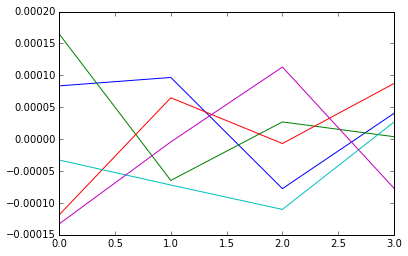

In [134]:
a = models[4]['coefficients']
plt.plot(a['Climb']['factors'][0])
plt.plot(a['Climb']['factors'][50])
plt.plot(a['Climb']['factors'][100])
plt.plot(a['Climb']['factors'][150])
plt.plot(a['Climb']['factors'][200])


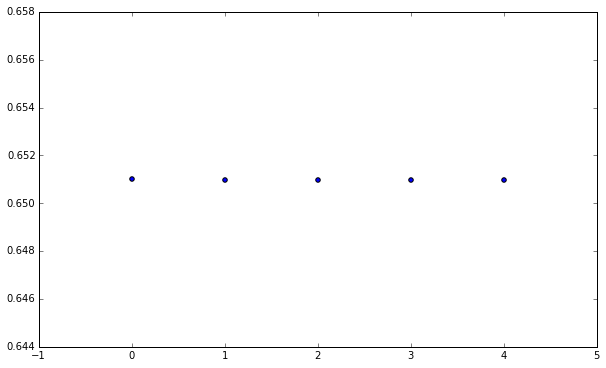

In [135]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(list(num_factors),mse_scores[:len(num_factors)])

In [136]:
user = [random.choice(df_data.User.unique())]
models[4].get_similar_users(user, k=19)

PROGRESS: Getting similar users completed in 0.000479


User,similar,distance,rank
108076266,105987922,1.97190207243,1
108076266,106526731,1.95769768953,2
108076266,106134237,1.92297840118,3
108076266,105819862,1.8971144557,4
108076266,10232,1.88430702686,5
108076266,10850,1.84253692627,6
108076266,106126874,1.83018690348,7
108076266,106055829,1.79778003693,8
108076266,105935039,1.79170119762,9
108076266,105835284,1.78426349163,10


In [137]:
item = [random.choice(df_data.Climb.unique())]
models[4].get_similar_items(item, k=19)

PROGRESS: Getting similar items completed in 0.000471


Climb,similar,distance,rank
105752269,105741476,1.98302972317,1
105752269,105722671,1.9693146944,2
105752269,105748310,1.96782982349,3
105752269,105740444,1.96394860744,4
105752269,106121675,1.96306294203,5
105752269,106113458,1.9604061842,6
105752269,106370830,1.94018816948,7
105752269,105732362,1.93997603655,8
105752269,106050176,1.93959927559,9
105752269,105857287,1.93819093704,10


##Test each observed item feature

In [ ]:
#Currently in Observed Features notebook

##Popularity Recommender

In [138]:
data_set_pop = 'star5'
df_data_pop = pd.read_csv(data_set+'.csv')
sf_data_pop = gl.SFrame(df_data)
sf_data_pop

Climb,User,rating
105989461,107860315,5
105857287,107860315,4
105983489,107860315,5
105762201,107860315,4
105753838,107860315,4
105753754,107860315,4
105753760,107860315,4
105753391,107860315,4
105753397,107860315,5
105753394,107860315,3


In [139]:
df_obs = pd.read_csv(data_set+'_observed_features.csv')
df_obs.head()

,Climb,location,rating,rating_dif,star_votes,stars,sub_location,type
0,105741011,Idaho,14.5,0,164,3.8,City of Rocks,Trad
1,105822918,Utah,14.5,0,102,4.1,Wasatch Range,Trad
2,105721840,California,17.5,0,80,3.8,Joshua Tree National Park,Trad
3,105858078,International,21.0,0,57,4.2,North America,Sport
4,105732260,Nevada,17.5,0,154,4.1,Red Rock,Trad


In [140]:
m_pop = gl.recommender.popularity_recommender.create(sf_data,
                                             user_id='User', 
                                             item_id='Climb', 
                                             target='rating')

PROGRESS: Recsys training: model = popularity
PROGRESS: Preparing data set.
PROGRESS:     Data has 9659 observations with 259 users and 299 items.
PROGRESS:     Data prepared in: 0.010941s
PROGRESS: 9659 observations to process; with 299 unique items.


In [141]:
user = [random.choice(df_data.User.unique())]
m_pop.get_similar_users(user, k=19)

PROGRESS: Getting similar users completed in 0.000495


User,similar,distance,rank
106020445,10232,20736.0,1
106020445,10185,13924.0,2
106020445,105936209,12321.0,3
106020445,14537,9216.0,4
106020445,10168,7921.0,5
106020445,14213,7396.0,6
106020445,106192059,5476.0,7
106020445,14015,5184.0,8
106020445,10481,5041.0,9
106020445,106554608,4489.0,10


#Scratch Work

In [12]:
regularization_vals = [1e-1,1e-2,1e-3,1e-4]
models = [gl.factorization_recommender.create(train_set, 'User', 'Climb', 'rating',
                                              max_iterations=5000, num_factors=5, regularization=r)
          for r in regularization_vals]

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 39235 observations with 699 users and 940 items.
PROGRESS:     Data prepared in: 0.036641s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 5        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0.1      |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | linear_regularization          | L2 Regularization on Linear Coefficients  

[0.7439914377751721,
 0.5868564871392089,
 0.5719898849095584,
 0.6095957168183448]

In [66]:
m = gl.factorization_recommender.create(train_set, 'User', 'Climb', 'rating',
                                    item_data = sf_climb_observed,
                                    max_iterations=5000, num_factors=5, 
                                    regularization=0.0000001)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 39404 observations with 699 users and 1880 items.
PROGRESS:     Data prepared in: 0.052285s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 5        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 1e-07    |
PROGRESS: | solver                         | Solver used for training                         | adagrad  |
PROGRESS: | linear_regularization          | L2 Regularization on Linear Coefficients 

In [6]:
data_url = 'https://s3.amazonaws.com/dato-datasets/movie_ratings/sample.small'
sf = gl.SFrame.read_csv(data_url,delimiter='\t',column_type_hints={'rating':int})

[INFO] This trial license of GraphLab Create is assigned to dmneal@gmail.com and will expire on August 05, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-7946 - Server binary: /home/devin/anaconda/envs/dato-env/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1438729541.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Downloading https://s3.amazonaws.com/dato-datasets/movie_ratings/sample.small to /var/tmp/graphlab-devin/7946/000000.small
PROGRESS: Finished parsing file https://s3.amazonaws.com/dato-datasets/movie_ratings/sample.small
PROGRESS: Parsing completed. Parsed 100 lines in 0.845794 secs.
PROGRESS: Read 1549015 lines. Lines per second: 2.1482e+06
PROGRESS: Finished parsing file https://s3.amazonaws.com/dato-datasets/movie_ratings/sample.small
PROGRESS: Parsing completed. Parsed 4000000 lines in 1.14536 secs.


In [3]:
gl.SFrame([1,2,3])

[INFO] This non-commercial license of GraphLab Create is assigned to dmneal@gmail.comand will expire on August 05, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-8127 - Server binary: /home/devin/anaconda/envs/dato-env/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1438820887.log
[INFO] GraphLab Server Version: 1.5.2


X1
1
2
3
